In [3]:
from Core_lib import *

In [4]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"
mpl.rcParams.update({'figure.autolayout': True})

## Average order parameter vs V

In [5]:
n = 12
phi = 0
w = 0.1
Vs = 1 + 0.1*np.arange(10,-4,-1)
Models = {}
DOSes = {}
eexes = {}
for V in Vs:
    chain = chainFC(n = n, phi = phi,v = -V, u = V/2, w = w,PBC = True, phase = 0)
    Models[V] = simple_ring(chain)
    Models[V].iterate()

Convergence took 16 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 20 iterations
Convergence took 21 iterations
Convergence took 23 iterations
Convergence took 24 iterations
Convergence took 26 iterations
Convergence took 28 iterations
Convergence took 30 iterations
Convergence took 33 iterations
Convergence took 37 iterations
Convergence took 60 iterations


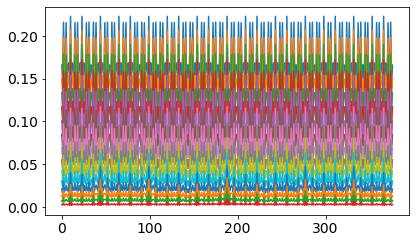

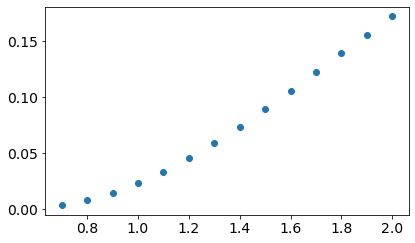

In [6]:
for V in Vs:
    plt.plot(Models[V].Delta.real)
plt.show()
    
plt.plot(Vs,[np.mean(Models[V].Delta.real) for V in Vs], "o")

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


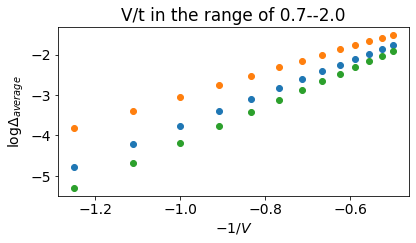

In [9]:
fig, ax = plt.subplots()

ax.plot(-1/Vs[:-1],[np.log(np.mean(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.plot(-1/Vs[:-1],[np.log(np.max(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.plot(-1/Vs[:-1],[np.log(np.min(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.set_xlabel("$-1/V$")
ax.set_ylabel("$\\log \\Delta_{average}$")
ax.set_title("V/t in the range of 0.7--2.0")

plt.savefig("Images/Delta_vs_V.pdf")

## Self-similarity of OP

In [16]:
n = 15
phi = 0
w = 0.1
V = 1.5

chain = chainFC(n = n, phi = phi,v = -V, u = V/2, w = w,PBC = True, phase = 0)
Model = simple_ring(chain)
Model.iterate()

Convergence took 21 iterations


(array([0.08451293+0.j, 0.07053893+0.j, 0.11735536+0.j, ...,
        0.11735536+0.j, 0.07053893+0.j, 0.08451293+0.j]),
 array([-0.74993983, -0.74990245, -0.74998647, ..., -0.74998647,
        -0.74990245, -0.74993983]))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


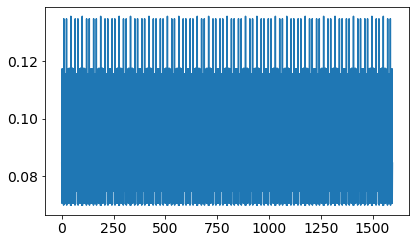

In [17]:
plt.plot(Model.Delta)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


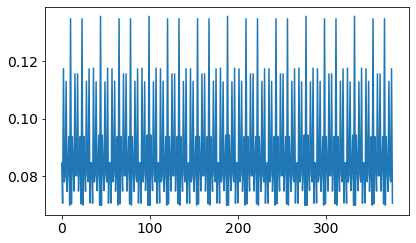

In [22]:
plt.plot(Model.Delta[1597//2-377//2:1597//2+377//2])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


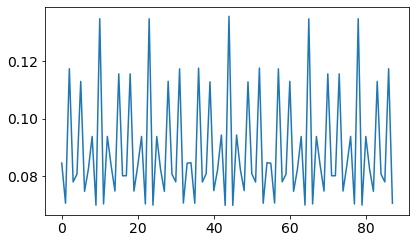

In [19]:
plt.plot(Model.Delta[1597//2-377//2:1597//2+377//2][377//2-89//2:377//2+89//2])

## Temperature dependence of average Delta

In [3]:
n = 8
phi = 0
w = 0.1
V = 1.5
kTs = np.linspace(0.01,0.12,20)
betas = 1/kTs
Models = {}
DOSes = {}
eexes = {}
for beta in tqdm(betas):
    chain = chainFC(n = n, phi = phi,v = -V, u = V/2, w = w,PBC = True, phase = 0)
    Models[beta] = simple_ring(chain, beta = beta)
    Models[beta].iterate()

 10%|█         | 2/20 [00:00<00:02,  7.62it/s]

Convergence took 21 iterations
Convergence took 21 iterations


 20%|██        | 4/20 [00:00<00:02,  7.64it/s]

Convergence took 21 iterations
Convergence took 22 iterations


 30%|███       | 6/20 [00:00<00:01,  7.56it/s]

Convergence took 22 iterations
Convergence took 24 iterations


 40%|████      | 8/20 [00:01<00:01,  6.99it/s]

Convergence took 25 iterations
Convergence took 28 iterations


 50%|█████     | 10/20 [00:01<00:01,  5.96it/s]

Convergence took 31 iterations
Convergence took 37 iterations


 55%|█████▌    | 11/20 [00:01<00:01,  5.16it/s]

Convergence took 47 iterations


 60%|██████    | 12/20 [00:02<00:01,  4.01it/s]

Convergence took 71 iterations


 65%|██████▌   | 13/20 [00:07<00:13,  1.94s/it]

Convergence took 1128 iterations


 70%|███████   | 14/20 [00:11<00:14,  2.42s/it]

Convergence took 678 iterations


 75%|███████▌  | 15/20 [00:15<00:13,  2.74s/it]

Convergence took 650 iterations


 80%|████████  | 16/20 [00:17<00:10,  2.63s/it]

Convergence took 427 iterations


 85%|████████▌ | 17/20 [00:19<00:07,  2.37s/it]

Convergence took 322 iterations


 90%|█████████ | 18/20 [00:20<00:04,  2.08s/it]

Convergence took 261 iterations


 95%|█████████▌| 19/20 [00:21<00:01,  1.83s/it]

Convergence took 221 iterations


100%|██████████| 20/20 [00:22<00:00,  1.14s/it]

Convergence took 193 iterations


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

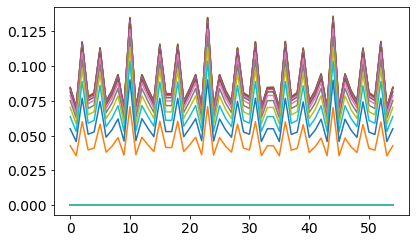

In [4]:
for beta in betas:
    plt.plot(Models[beta].Delta)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta_{averrag}$')

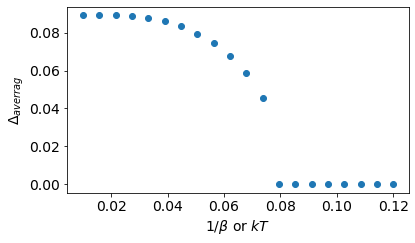

In [15]:
fig, ax = plt.subplots()
ax.plot(1/betas,[np.mean(Models[beta].Delta) for beta in betas], "o")
ax.set_xlabel("$1/\\beta$ or $kT$")
ax.set_ylabel("$\\Delta_{average}$")


## DOS vs w

Convergence took 23 iterations
Convergence took 23 iterations
Convergence took 21 iterations
Convergence took 20 iterations


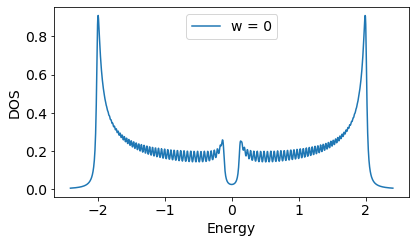

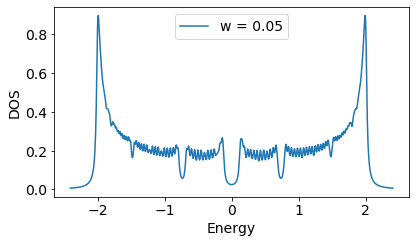

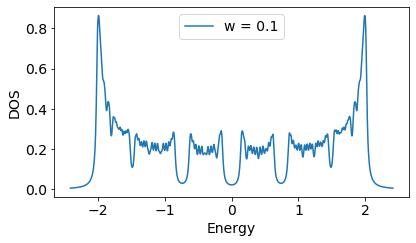

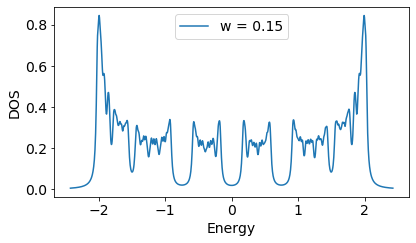

In [31]:
n = 11
phi = 0
ws = [0,0.05,0.1,0.15]
Models = {}
DOSes = {}
eexes = {}
for w in ws:
    chain = chainFC(n = n, phi = phi,v = -1.5, u = 0.75, w = w,PBC = True, phase = 0)
    Models[w] = simple_ring(chain)
    Models[w].iterate()
    
    DOSes[w], eexes[w] = Models[w].get_DOS(gam = 0.02)

for w in ws:
    fig, ax = plt.subplots()
    ax.plot(eexes[w], DOSes[w], label = "w = {}".format(w)) 
    ax.set_xlabel("Energy")
    ax.set_ylabel("DOS")
    ax.legend()
    
# For Chris:
# How does the height of the coherence peaks (the local maxima around the cental superconducting gap) depend 
# on the modulation strength w?
# hard cap on w, w < 1.3


## Basic calculations test

Convergence took 21 iterations


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta_i$')

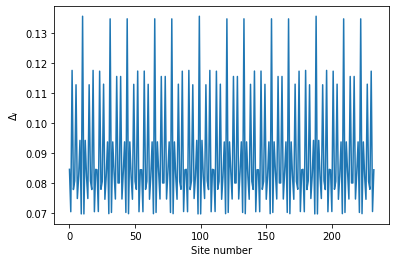

In [2]:
n = 11
phi = 1.2
chain = chainFC(n = n, phi = phi,v = -1.5, u = 0.75, w = 0.1,PBC = True, phase = 0)
Model = simple_ring(chain)
Model.iterate()

fig, ax = plt.subplots()

ax.plot(Model.Delta)
ax.set_xlabel("Site number")
ax.set_ylabel("$\\Delta_i$")

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta$')

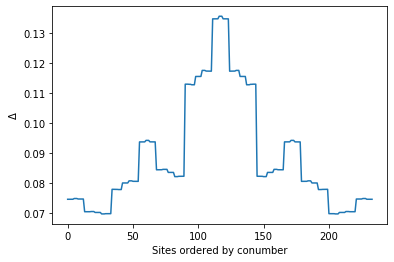

In [4]:
fig, ax = plt.subplots()

seq = Fibonacci_sequence(n, phi)
ax.plot(Model.Delta[seq.get_ordering()])
ax.set_xlabel("Sites ordered by conumber")
ax.set_ylabel("$\\Delta$")

Text(0, 0.5, 'DOS')

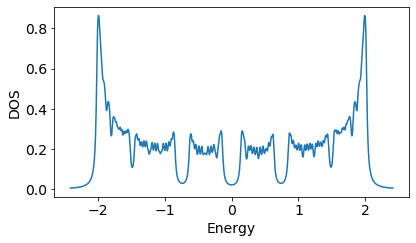

In [7]:
DOS, eex = Model.get_DOS(gam = 0.02)

fig, ax = plt.subplots()

ax.plot(eex, DOS)
ax.set_xlabel("Energy")
ax.set_ylabel("DOS")

In [9]:
phases = np.linspace(-np.pi,np.pi,50)
ev_list = []
for phase in phases:
    chain = chainFC(n = 12, v = -1.5, u = 0.75, w = 0.1,PBC = True, phase = phase)
    Model = simple_ring(chain)
    Model.iterate()
    ev_list.append(Model.evals)
    

Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations


[Text(0, 0, '$-\\pi/2$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi/2$')]

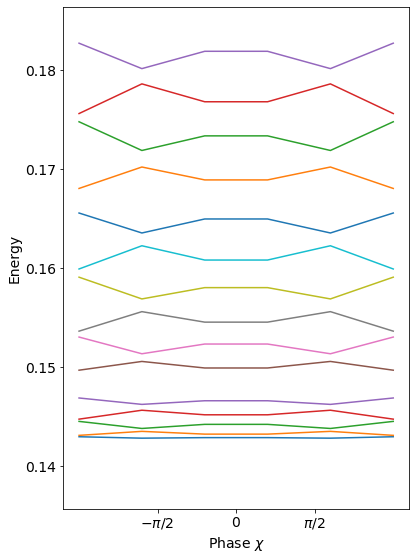

In [10]:
fig, ax = plt.subplots(figsize = (6,8))

ii = 15

ev_array = np.array(ev_list).T
[ax.plot(phases,ev) for ev in ev_array[:ii]]
ax.set_ylim([0.95*np.min(ev_array[:ii]), 1.02*np.max(ev_array[:ii])])
ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("Energy")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])


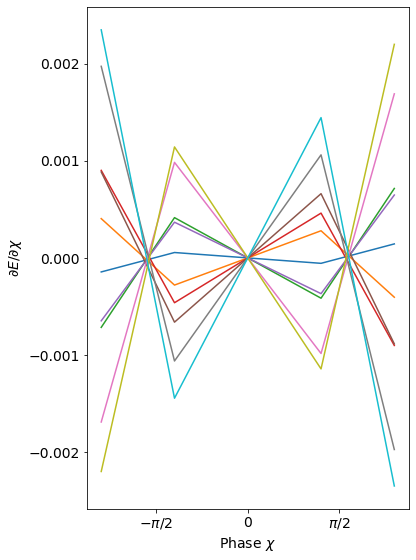

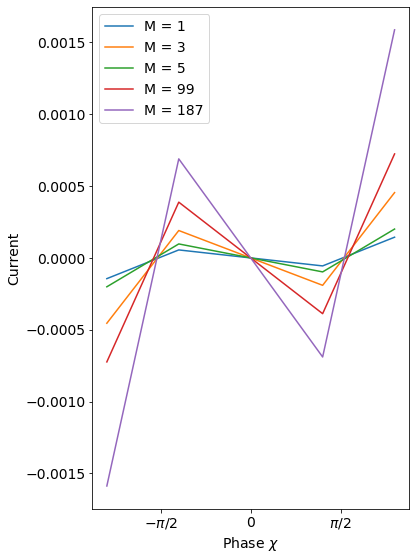

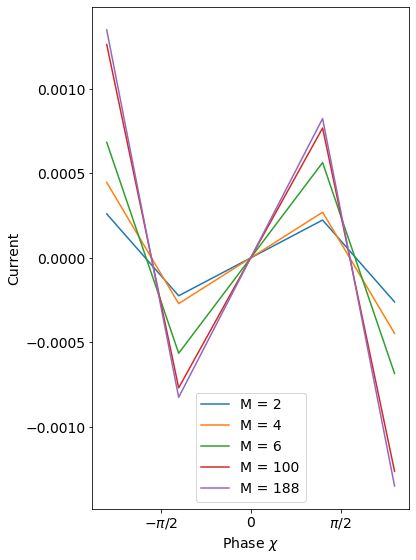

In [11]:
fig, ax = plt.subplots(figsize = (6,8))

ii = 10

ev_array = np.array(ev_list).T
[ax.plot((phases[1:] + phases[:-1])/2,np.diff(ev)) for ev in ev_array[:ii]]

ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("$\\partial E / \\partial \\chi$")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])

plt.savefig("temp_phase.pdf")

fig, ax = plt.subplots(figsize = (6,8))
ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("Current")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])

i = 0
for ii in (1,3,5,99,187):
    diff = [np.diff(ev) for ev in ev_array[:ii]]
    current = np.sum(diff,0)
    ax.plot((phases[1:] + phases[:-1])/2,current, "C"+str(i), label = "M = " + str(ii))
    i += 1
plt.legend()


fig, ax = plt.subplots(figsize = (6,8))
ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("Current")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])

i = 0
for ii in (2,4,6,100,188):
    diff = [np.diff(ev) for ev in ev_array[:ii]]
    current = np.sum(diff,0)
    ax.plot((phases[1:] + phases[:-1])/2,current, "C"+str(i), label = "M = " + str(ii))
    i += 1
plt.legend()



In [32]:
tau = (1 + np.sqrt(5))/2

In [52]:
w = 1.3
wa = 2*w/(1+tau)
tA = 1 - 2*w/(1+tau)
tB = 1 + tau*wa
print(tA, tB)

0.006888370749726591 2.6068883707497266
